In [76]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

In [2]:
path = 'emotions-dataset-for-nlp'
files = os.listdir(path)
for f in files:
    print(f)

test.txt
train.txt
val.txt


In [9]:
test_data = pd.read_csv(path+"/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv(path+"/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
validation_data = pd.read_csv(path+"/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [10]:
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (16000, 2)
Test :  (2000, 2)
Validation :  (2000, 2)


In [11]:
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [12]:
train_data.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [14]:
train_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [15]:
train_data.describe()

,Comment,Emotion
count,16000,16000
unique,15969,6
top,i have chose for myself that makes me feel ama...,joy
freq,2,5362


In [16]:
train_data.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

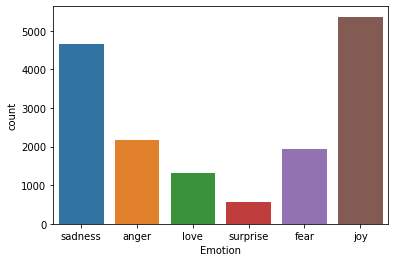

In [18]:
sns.countplot(x = 'Emotion',data=train_data)
plt.show()

In [37]:
train_data["length"] = [len(i) for i in train_data["Comment"]]

<AxesSubplot:xlabel='length', ylabel='Density'>

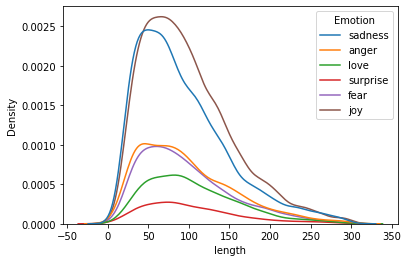

In [38]:
sns.kdeplot(x=train_data["length"], hue=train_data["Emotion"])

In [30]:
test_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

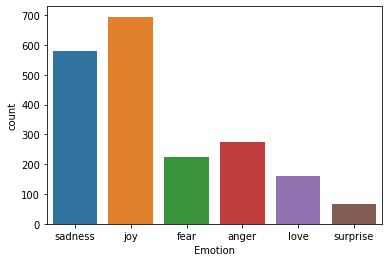

In [31]:
sns.countplot(x = 'Emotion',data=test_data)
plt.show()

In [32]:
test_data.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

In [34]:
validation_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [35]:
validation_data.Emotion.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

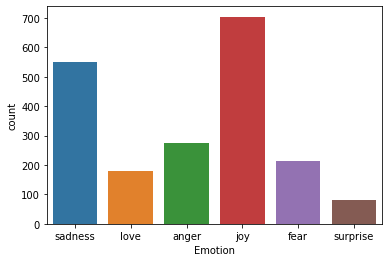

In [36]:
sns.countplot(x = 'Emotion',data=validation_data)
plt.show()

## Data Preprocessing

In [40]:
lb = LabelEncoder()
train_data["Emotion"] = lb.fit_transform(train_data["Emotion"])
test_data["Emotion"] = lb.fit_transform(test_data["Emotion"])
validation_data["Emotion"] = lb.fit_transform(validation_data["Emotion"])

In [42]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [44]:
vocab_size = 10000
train_data["length"].max()

300

In [45]:
train_data["length"].min()

7

In [46]:
len_sentence = 150

In [47]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def text_preprocess(data, column):
    print(data.shape)
    stemmer = PorterStemmer()
    corpus = []
    
    for text in data[column]:
        text = re.sub("[^a-zA-Z0-9]", " ", text)
        
        text = text.lower()
        text = text.split()
        
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    embeddec_doc = pad_sequences(sequences=one_hot_word,
                              maxlen=len_sentence,
                              padding="pre")
    print(data.shape)
    return embeddec_doc

In [50]:
x_train=text_preprocess(train_data, "Comment")

(16000, 3)
(16000, 3)


In [57]:
x_test=text_preprocess(test_data, "Comment")

(2000, 2)
(2000, 2)


In [58]:
x_validate=text_preprocess(validation_data, "Comment")

(2000, 2)
(2000, 2)


In [59]:
x_train.shape

(16000, 150)

In [60]:
x_train[1500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 3242, 4133, 1369, 4809, 9614,
       4958, 6602, 4672, 1142, 3834, 2245, 2118])

In [61]:
y_train=train_data["Emotion"]
y_validate=validation_data["Emotion"]
y_test=test_data["Emotion"]

In [64]:
encoder = OneHotEncoder()
y_train = np.array(y_train)
y_train = encoder.fit_transform(y_train.reshape(-1,1)).toarray()

In [65]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [66]:
y_test = np.array(y_test)
y_validate = np.array(y_validate)

y_test = encoder.fit_transform(y_test.reshape(-1,1)).toarray()
y_validate = encoder.fit_transform(y_validate.reshape(-1,1)).toarray()

## LSTM model

In [68]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=150, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(6, activation="softmax"))

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 150)          1500000   
_________________________________________________________________
dropout (Dropout)            (None, 150, 150)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               142848    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

In [71]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [72]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [74]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
250/250 [==============================] - 76s 293ms/step - loss: 0.5632 - accuracy: 0.8218 - val_loss: 0.4540 - val_accuracy: 0.8490

Epoch 00001: val_accuracy improved from 0.70350 to 0.84900, saving model to .\model.h5
Epoch 2/20
250/250 [==============================] - 77s 308ms/step - loss: 0.2940 - accuracy: 0.9050 - val_loss: 0.3876 - val_accuracy: 0.8645

Epoch 00002: val_accuracy improved from 0.84900 to 0.86450, saving model to .\model.h5
Epoch 3/20
250/250 [==============================] - 74s 297ms/step - loss: 0.2064 - accuracy: 0.9317 - val_loss: 0.3776 - val_accuracy: 0.8750

Epoch 00003: val_accuracy improved from 0.86450 to 0.87500, saving model to .\model.h5
Epoch 4/20
250/250 [==============================] - 77s 309ms/step - loss: 0.1570 - accuracy: 0.9449 - val_loss: 0.4075 - val_accuracy: 0.8700

Epoch 00004: val_accuracy did not improve from 0.87500
Epoch 5/20
250/250 [==============================] - 81s 323ms/step - loss: 0.1298 - accuracy: 0.95

## RNN Model

In [77]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=150, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(6, activation="softmax"))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 150)          1500000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 150)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               35712     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [79]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [80]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [81]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
250/250 [==============================] - 35s 123ms/step - loss: 1.6534 - accuracy: 0.3074 - val_loss: 1.3745 - val_accuracy: 0.5050

Epoch 00001: val_accuracy improved from -inf to 0.50500, saving model to .\model.h5
Epoch 2/20
250/250 [==============================] - 31s 124ms/step - loss: 1.2563 - accuracy: 0.5585 - val_loss: 0.7968 - val_accuracy: 0.7200

Epoch 00002: val_accuracy improved from 0.50500 to 0.72000, saving model to .\model.h5
Epoch 3/20
250/250 [==============================] - 32s 129ms/step - loss: 0.6293 - accuracy: 0.7937 - val_loss: 0.6941 - val_accuracy: 0.7580

Epoch 00003: val_accuracy improved from 0.72000 to 0.75800, saving model to .\model.h5
Epoch 4/20
250/250 [==============================] - 32s 129ms/step - loss: 0.4144 - accuracy: 0.8630 - val_loss: 0.5254 - val_accuracy: 0.8195

Epoch 00004: val_accuracy improved from 0.75800 to 0.81950, saving model to .\model.h5
Epoch 5/20
250/250 [==============================] - 32s 129ms/step - 

## GRU Model

In [82]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=150, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(6, activation="softmax"))

In [83]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [84]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [85]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
250/250 [==============================] - 69s 253ms/step - loss: 1.7157 - accuracy: 0.3093 - val_loss: 0.7740 - val_accuracy: 0.7610

Epoch 00001: val_accuracy improved from -inf to 0.76100, saving model to .\model.h5
Epoch 2/20
250/250 [==============================] - 67s 267ms/step - loss: 0.5581 - accuracy: 0.8303 - val_loss: 0.3809 - val_accuracy: 0.8700

Epoch 00002: val_accuracy improved from 0.76100 to 0.87000, saving model to .\model.h5
Epoch 3/20
250/250 [==============================] - 65s 260ms/step - loss: 0.2838 - accuracy: 0.9040 - val_loss: 0.3489 - val_accuracy: 0.8745

Epoch 00003: val_accuracy improved from 0.87000 to 0.87450, saving model to .\model.h5
Epoch 4/20
250/250 [==============================] - 69s 276ms/step - loss: 0.1970 - accuracy: 0.9319 - val_loss: 0.3536 - val_accuracy: 0.8745

Epoch 00004: val_accuracy did not improve from 0.87450
Epoch 5/20
250/250 [==============================] - 64s 254ms/step - loss: 0.1583 - accuracy: 0.9415 